In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
training_data = pd.read_csv(r'/home/nilesh/Desktop/MY FILES/DEEP LEARNING COURSE/4. Recurrent_Neural_Networks/Google_Stock_Price_Train.csv' , delimiter = ',')

In [3]:
training_set = training_data.iloc[: , 1:2].values
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [4]:
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler(feature_range=(0,1))
training_set_scl = scl.fit_transform(training_set)

In [5]:
#60 timesteps and one output
xtrain = []
ytrain = []
for i in range(60 , len(training_set_scl)):
    xtrain.append(training_set_scl[i-60:i, 0])
    ytrain.append(training_set_scl[i,0])
xtrain,ytrain = np.array(xtrain),np.array(ytrain)

In [6]:
xtrain.shape ,ytrain

((1198, 60),
 array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
        0.93688146]))

In [7]:
xtrain = np.reshape(xtrain , (xtrain.shape[0] , xtrain.shape[1] , 1))

In [8]:
from keras.layers import Dense , LSTM , Dropout
from keras.models import Sequential

Using TensorFlow backend.


In [9]:
regressor = Sequential()

In [10]:
regressor.add(LSTM(units = 50 , return_sequences=True , input_shape=(xtrain.shape[1],1)))
regressor.add(Dropout(0.2))

In [11]:
regressor.add(LSTM(units = 50 , return_sequences=True))
regressor.add(Dropout(0.2))

In [12]:
regressor.add(LSTM(units = 50 , return_sequences=True))
regressor.add(Dropout(0.2))

In [13]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [14]:
regressor.add(Dense(units = 1))

In [15]:
regressor.compile(optimizer='adam' , loss = 'mean_squared_error')

In [16]:
regressor.fit(xtrain , ytrain , epochs = 100 , batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0414
Epoch 2/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0063
Epoch 3/100
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0056
Epoch 4/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0053
Epoch 5/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0051
Epoch 6/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0046
Epoch 7/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0051
Epoch 8/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0038
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0040
Epoch 10/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0044
Epoch 11/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0039
Epoch 12/100
1198/1198 [==============================] - 8s 7ms/step - l

1198/1198 [==============================] - 4s 4ms/step - loss: 0.0013
Epoch 98/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0014
Epoch 99/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0014
Epoch 100/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0016


In [17]:
data_test_set = training_data = pd.read_csv(r'/home/nilesh/Desktop/MY FILES/DEEP LEARNING COURSE/4. Recurrent_Neural_Networks/Google_Stock_Price_Test.csv' , delimiter = ',')

In [19]:
testing_set = data_test_set.iloc[: , 1:2].values

In [36]:
print(training_data)

            Date    Open    High     Low   Close      Volume
0       1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1       1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2       1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3       1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4       1/9/2012  322.04  322.29  309.46  620.76  11,688,800
5      1/10/2012  313.70  315.72  307.30  621.43   8,824,000
6      1/11/2012  310.59  313.52  309.40  624.25   4,817,800
7      1/12/2012  314.43  315.26  312.08  627.92   3,764,400
8      1/13/2012  311.96  312.30  309.37  623.28   4,631,800
9      1/17/2012  314.81  314.81  311.67  626.86   3,832,800
10     1/18/2012  312.14  315.82  309.90  631.18   5,544,000
11     1/19/2012  319.30  319.30  314.55  637.82  12,657,800
12     1/20/2012  294.16  294.40  289.76  584.39  21,231,800
13     1/23/2012  291.91  293.23  290.49  583.92   6,851,300
14     1/24/2012  292.07  292.74  287.92  579.34   6,134,400
15     1/25/2012  287.68

In [37]:
dataset_total = pd.concat((training_data['Open'] , data_test_set['Open']) , axis = 0)
print(dataset_total)
inputs = dataset_total[len(dataset_total) - len(data_test_set) - 60 :].values

0       325.25
1       331.27
2       329.83
3       328.34
4       322.04
5       313.70
6       310.59
7       314.43
8       311.96
9       314.81
10      312.14
11      319.30
12      294.16
13      291.91
14      292.07
15      287.68
16      284.92
17      284.32
18      287.95
19      290.41
20      291.38
21      291.34
22      294.23
23      296.39
24      302.44
25      303.18
26      304.87
27      302.81
28      304.11
29      304.63
         ...  
1248    800.40
1249    790.22
1250    796.76
1251    795.84
1252    792.36
1253    790.90
1254    790.68
1255    793.70
1256    783.33
1257    782.75
0       778.81
1       788.36
2       786.08
3       795.26
4       806.40
5       807.86
6       805.00
7       807.14
8       807.48
9       807.08
10      805.81
11      805.12
12      806.91
13      807.25
14      822.30
15      829.62
16      837.81
17      834.71
18      814.66
19      796.86
Name: Open, Length: 1278, dtype: float64


In [38]:
inputs = inputs.reshape(-1,1)

In [39]:
inputs = scl.transform(inputs)

In [40]:
inputs.shape

(80, 1)

In [41]:
xtest = []
for i in range(60 , 80):
    xtest.append(inputs[i-60:i,0])
xtest = np.array(xtest)
xtest.shape

(20, 60)

In [44]:
xtest = np.reshape(xtest , (xtest.shape[0] , xtest.shape[1] , 1))

In [45]:
predicted_stoc = regressor.predict(xtest)
predicted_stock = scl.inverse_transform(predicted_stoc)

In [47]:
predicted_stock.shape

(20, 1)

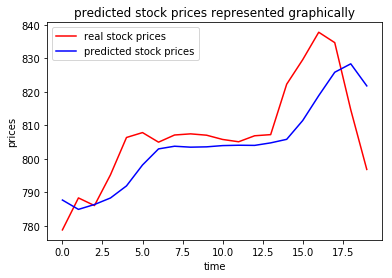

In [48]:
plt.plot(testing_set , color = 'red' , label = 'real stock prices')
plt.plot(predicted_stock , color = 'blue' , label = 'predicted stock prices')
plt.title('predicted stock prices represented graphically')
plt.xlabel('time')
plt.ylabel('prices')
plt.legend()
plt.show()